In [2]:
# Import RBF kernels
from sklearn.gaussian_process.kernels import RBF, Matern # you can try to import other kernels from sklearn as well
import numpy as np


In [ ]:
# Sampling from a Gaussian process
# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html

# RBF kernel


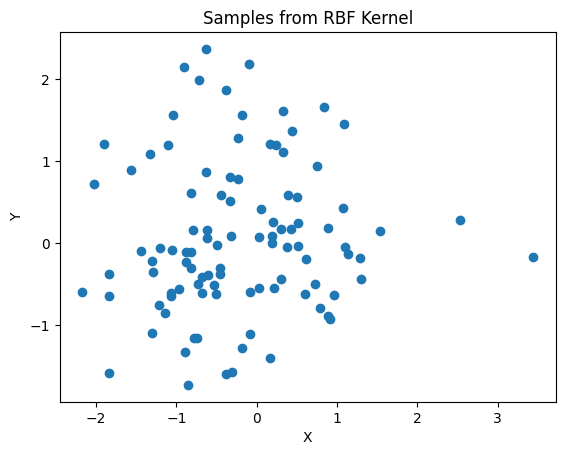

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel(x, y, sigma):
    """
    Computes the Radial Basis Function (RBF) kernel between two vectors.

    Args:
        x, y: Input vectors.
        sigma: RBF kernel parameter controlling the width of the kernel.

    Returns:
        The RBF kernel value.
    """
    distance = np.linalg.norm(x - y)
    return np.exp(-distance ** 2 / (2 * sigma ** 2))

def sample_from_rbf_kernel(num_samples, sigma):
    """
    Samples points from a Radial Basis Function (RBF) kernel.

    Args:
        num_samples: Number of samples to generate.
        sigma: RBF kernel parameter controlling the width of the kernel.

    Returns:
        The sampled points as a NumPy array.
    """
    # Generate random points in a 2D space
    x = np.random.rand(num_samples, 2)

    # Compute the RBF kernel matrix
    kernel_matrix = np.zeros((num_samples, num_samples))
    for i in range(num_samples):
        for j in range(i, num_samples):
            kernel_matrix[i, j] = rbf_kernel(x[i], x[j], sigma)
            kernel_matrix[j, i] = kernel_matrix[i, j]

    # Perform eigenvalue decomposition of the kernel matrix
    eigvals, eigvecs = np.linalg.eigh(kernel_matrix)

    # Sample points from the eigenvectors
    sampled_points = np.dot(eigvecs * np.sqrt(eigvals), np.random.randn(num_samples, len(eigvals))).T

    return sampled_points

# Set the number of samples and sigma value
num_samples = 100
sigma = 0.1

# Generate samples from the RBF kernel
samples = sample_from_rbf_kernel(num_samples, sigma)

# Plot the sampled points
plt.scatter(samples[0], samples[1])
plt.title("Samples from RBF Kernel")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
